In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/", one_hot=True)

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


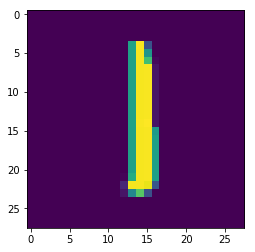

In [4]:
plt.imshow(mnist.train.images[12].reshape(28,28))

In [5]:
def generator(z, reuse=None):
    with tf.variable_scope("gen", reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z, units=128)
        hidden1 = tf.nn.leaky_relu(hidden1, alpha=0.01)
        
        hidden2 = tf.layers.dense(inputs=hidden1, units=128)
        hidden2 = tf.nn.leaky_relu(hidden2, alpha=0.01)
        
        output = tf.layers.dense(hidden2, units=784, activation=tf.nn.tanh)
        
        return output 

In [6]:
def discriminator(z, reuse=None):
    with tf.variable_scope("dis", reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z, units=128)
        hidden1 = tf.nn.leaky_relu(hidden1, alpha=0.01)
        
        hidden2 = tf.layers.dense(inputs=hidden1, units=128)
        hidden2 = tf.nn.leaky_relu(hidden2, alpha=0.01)
        
        logits = tf.layers.dense(hidden2, units=1)
        output = tf.sigmoid(logits)
        
        return output, logits

In [7]:
real_images = tf.placeholder(tf.float32, shape=[None, 784])
z = tf.placeholder(tf.float32, shape=[None, 100])

In [8]:
G = generator(z)

AttributeError: module 'tensorflow.python.ops.nn' has no attribute 'leaky_relu'

In [ ]:
D_output_real, D_logits_real = discriminator(real_images)

In [ ]:
D_output_fake, D_logits_fake = discriminator(G, reuse=True)

In [ ]:
# Losses

def loss_func(logits_in, labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in, labels=labels_in))

In [ ]:
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9)
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_real))

In [ ]:
D_loss = D_real_loss + D_fake_loss

In [ ]:
G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))

In [ ]:
learning_rate = 0.001

In [ ]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if "dis" in var.name]
g_vars = [var for var in tvars if "gen" in var.name]

In [ ]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=g_vars)

In [ ]:
d_vars

In [ ]:
batch_size = 100
epochs = 30
init = tf.global_variables_initializer()

In [ ]:
samples = []

In [ ]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        for i in range(num_batches):
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images * 2 -1
            
            batch_z = np.random.uniform(-1,1,size=(batch_size, 100))
            
            _ = sess.run(D_trainer, feed_dict={real_images: batch_images, z: batch_z})
            _ = sess.run(G_trainer, feed_dict = {z:batch_z})
            
        print("On Epoch {}".format(epoch))
        
        sample_z = np.random.uniform(-1, 1, size=(1,100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict={z:sample_z})
        
        samples.append(gen_sample)

In [ ]:
plt.imshow(samples[4].reshape(28,28))

In [ ]:
plt.imshow(samples[20].reshape(28,28))

In [ ]:
plt.imshow(samples[29].reshape(28,28))

In [ ]:
saver = tf.train.Saver(var_list = g_vars)

In [ ]:
new_samples = []
with tf.Session() as sess:
    
    saver.restore(sess, "./models/500_epoch_model.ckpt")
    
    for i in range(5):
        sample_z = np.random.uniform(-1, 1, size=(1,100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict={z:sample_z})
        
        new_samples.append(gen_sample)

In [ ]:
plt.imshow(new_samples[3].reshape(28,28))